## 경사하강법

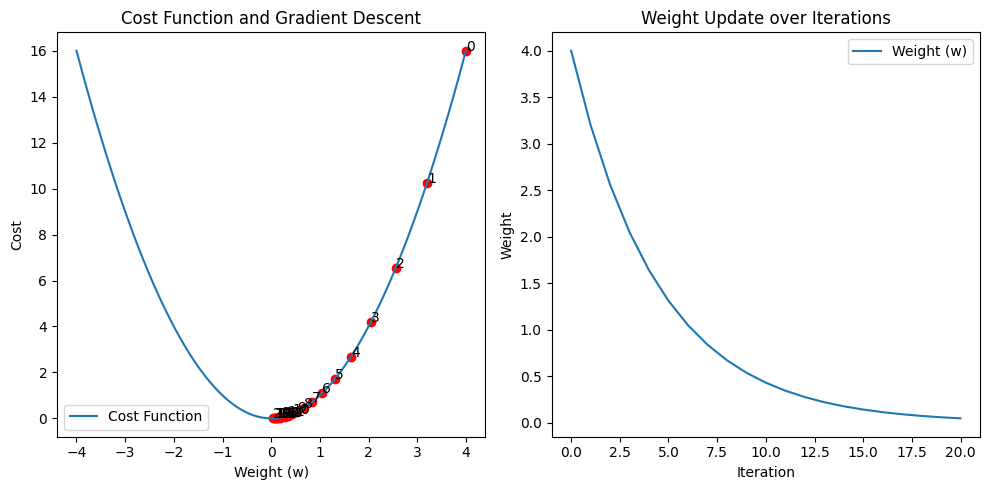

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 비용 함수와 그 기울기 정의
def cost_function(w):
    return w ** 2

def gradient(w):
    return 2 * w

# 초기 가중치 설정
w = 4
learning_rate = 0.1
iterations = 20

# 가중치 업데이트 기록을 저장할 리스트
weights = [w]
costs = [cost_function(w)]

# 경사하강법 수행
for _ in range(iterations):
    grad = gradient(w)
    w = w - learning_rate * grad
    weights.append(w)
    costs.append(cost_function(w))

# 시각화
plt.figure(figsize=(10, 5))

# 비용 함수 시각화
plt.subplot(1, 2, 1)
w_values = np.linspace(-4, 4, 100)
cost_values = cost_function(w_values)
plt.plot(w_values, cost_values, label='Cost Function')
plt.scatter(weights, costs, color='red')
for i in range(len(weights)):
    plt.annotate(f'{i}', (weights[i], costs[i]))
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.title('Cost Function and Gradient Descent')
plt.legend()

# 가중치 업데이트 시각화
plt.subplot(1, 2, 2)
plt.plot(weights, label='Weight (w)')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weight Update over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


비용 함수와 경사하강법
- 좌측 그래프는 비용 함수 f(w)=$w^2$ 의 그래프입니다.
- 빨간 점들은 각 반복(iteration)에서 가중치 w와 그에 따른 비용 함수 값을 나타냅니다.
점들은 초기 가중치 $w_{0}$ = 4에서 시작하여, 반복적으로 기울기를 따라 비용 함수의 최소값 w=0으로 수렴합니다.

가중치 업데이트 과정:
- 우측 그래프는 반복에 따른 가중치 w의 변화를 나타냅니다.
- 초기 가중치에서 시작하여, 각 반복마다 가중치가 점점 줄어들어 최적의 값에 수렴하는 것을 보여줍니다.

요약
- 기울기(Gradient): 특정 지점에서 비용 함수가 증가하는 방향과 크기를 나타내는 벡터입니다.
- 경사하강법(Gradient Descent): 기울기를 따라 가중치를 업데이트하여 비용 함수의 최솟값을 찾는 최적화 알고리즘입니다.
- 가중치 업데이트: 가중치는 기울기의 반대 방향으로 업데이트됩니다. 이는 비용 함수 값을 줄이기 위함입니다.
- 시각화: 비용 함수와 가중치 업데이트 과정을 시각화하여 경사하강법이 어떻게 작동하는지 알기 쉽게 보여줍니다.

이 시각화를 통해 경사하강법이 어떻게 작동하는지, 즉 초기 가중치에서 시작하여 기울기를 따라 내려가면서 비용 함수를 최소화하는 방향으로 가중치를 업데이트하는 과정을 쉽게 이해할 수 있습니다.

Ceofficients:  [0.20259144]
Mean squared error: 55.49
Coefficient of determination (R*2): 0.94


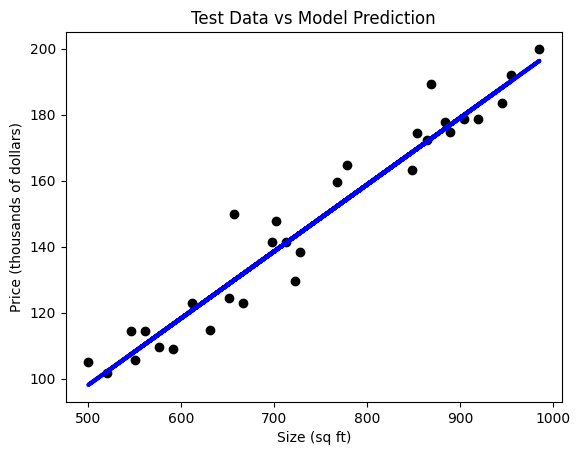

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {'Size': np.linspace(500,1000,100)}
df = pd.DataFrame(data)

np.random.seed(42)
noise = np.random.normal(0, 10, len(df['Size']))
df['Price'] = df['Size'] * 0.2 + noise

# Define the predictor variable (X) and the target variable (y)
# X는 데이터의 특성을 나타내는 이차원 배열이고 여러 특성을 포함할 수 있는 구조를 갖는 반면
# y는 예측하고자 하는 타겟 값을 나타내는 일차원 배열로 각 데이터 포인트에 대한 단일 출력값을 갖는다
# 이러한 구조는 대부분의 머신러닝 라이브러리들에서 표준적으로 사용되며 데이터의 구조를 명확하게 하고
# 모델링 과정을 간소화 하는 데 도움이 된다.

X = df[['Size']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Ceofficients: ", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination (R*2): %.2f" % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel("Size (sq ft)")
plt.ylabel("Price (thousands of dollars)")
plt.title("Test Data vs Model Prediction")

plt.show()

### 회귀 모델 평가

평균 제곱 오차(MSE):
- MSE는 오차의 제곱의 평균, 즉 추정값과 실제값의 차이의 평균제곱을 측정.MSE가 낮을수록 더 나은 적합성을 나타내지만 이상값에 민감할 수 있다.

RMSE(제곱 평균 오차):
- RMSE는 MSE의 제곱근으로 반응변수와 단위가 동일. 큰 오류에 상대적으로 높은 가중치를 부여하므로 큰 오류가 특히 바람직하지 않은 경우 유용.

평균 절대 오차(MAE):
- MAE는 방향을 고려하지 않고 추정값과 실제값 사이의 평균 거리, 즉 절대 오차의 평균을 측정. MSE 및 RMSE에 비해 이상값에 덜 민감.

RMSE vs MAE:
- MAE는 모든 오차를 절대값으로 취급하고, 이를 단순히 평균낸 것. 이 방식은 모든 오차를 동일하게 처리하며, 크기에 관계없이 같은 가중치를 부여.
- RMSE는 먼저 각 오차를 제곱하고, 이들의 평균을 구한 후 마지막으로 제곱근을 취한다. 이 방식은 큰 오차에 더 큰 가중치를 부여합. 따라서, RMSE는 이상값이나 큰 오차에 더 민감하게 반응

R 제곱(결정 계수):
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정. 범위는 0부터 1까지이며 값이 0이면 모형이 평균 주위의 반응 데이터 변동성을 전혀 설명하지 않는다는 것을 나타내고, 1은 모형이 모든 변동성을 설명한다는 것을 나타낸다.
  - 값의 범위: R-제곱은 0과 1 사이의 값을 가진다. 값이 0에 가까우면 모델이 데이터의 변동을 거의 설명하지 못하는 것이고, 1에 가까우면 데이터의 변동을 거의 완벽하게 설명한다는 의미.
  - 해석: R-제곱 값이 높다는 것은 모델이 데이터에 잘 맞는다는 것을 의미. 예를 들어, R-제곱이 0.9이면, 모델이 종속 변수의 변동의 90%를 설명한다고 해석할 수 있다.
  - 한계: R-제곱만으로 모델의 적합성을 완전히 판단하기는 어렵다. 모델에 불필요한 변수가 추가될 때마다 R-제곱 값은 감소하지 않고, 오히려 증가할 수 있기 때문. 이는 과적합(overfitting)의 가능성을 무시할 수 있음을 의미.
  - R 제곱 = 1 - (잔차의 제곱합/총제곱합) 여기서 총제곱합은 종속변수 값과 그 평균 간의 차이의 제곱합
  - 잔차의 제곱합/총제곱합 비율은 모델이 설명하지 못하는 데이터의 변동성의 비율을 나타낸다. 모델이 완벽하게 데이터를 예측한다면, SS_residual은 0이 되고, R-제곱은 1이 된다. 반대로, 이 비율이 높으면 높을수록 모델이 데이터를 잘 설명하지 못하는 것을 의미하며, R-제곱 값은 낮아진다.

수정된 R-제곱:
- 모델의 예측 변수 수에 대한 R 제곱을 조정합니다. 다양한 수의 독립 변수가 있는 모델을 비교하는 데 유용.
  - 수정된 R-제곱은 모델에 포함된 독립 변수의 수를 고려하여 R-제곱을 조정.
  - 이 조정을 통해 변수의 수가 모델의 성능 평가에 미치는 영향을 감소시킨다.
  - 수정된 R-제곱은 독립 변수의 수가 증가할 때 그 변수들이 모델의 설명력을 실질적으로 향상시키지 않는다면 감소할 수도 있다.
  - 따라서, 수정된 R-제곱은 변수의 수가 많은 모델을 평가할 때 더 신뢰할 수 있는 척도가 된다.
  -  변수의 수가 모델의 성능 평가에 미치는 영향을 조정하며, 모델의 과적합을 방지하는 데 도움을 준다.

교차 검증:
- 데이터를 하위 집합으로 나누고, 일부 하위 집합(훈련 세트)에서 모델을 훈련하고, 나머지 하위 집합(검증 세트)에서 모델을 평가하는 작업이 포함. 일반적인 방법에는 k-겹 교차 검증이 포함됩니다. 여기서는 데이터를 k개의 하위 집합으로 나누고 모델을 k번 훈련하며, 매번 다른 하위 집합을 검증 세트로 사용. 보이지 않는 데이터에 대한 모델 성능에 대한 보다 강력한 추정치를 제공.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 수정 결정 계수 : 독립 변수의 수와 표본 크기에 따라 조정한 값
n = X_test.shape[0] # 데이터 포인트의 수
p = X_test.shape[1] # 독립변수의 개수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Cross-validation
# MSE와 같은 손실 함수의 경우 값을 최소화하는 것이 좋다(MSE가 낮을수록 좋다)
# 이를 점수가 높으수록 더 좋은 scikit-learn의 프레임워크에 맞추기위해 MSE에 -1을 곱하여 음수 값으로 바꾼다.
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores).mean()

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print(f"Adjusted R-squared: {adjusted_r2}")
print("Cross-validation MSE:", cv_rmse)

데이터셋은 여러 개의 특성(피처)과 타겟 변수로 구성됩니다. 각 행은 하나의 지리적 블록 그룹(일종의 작은 행정 구역)에 해당하며, 각 특성은 해당 블록 그룹의 통계적 정보입니다.

특성(피처)
- MedInc: 블록 그룹의 중간 소득 (단위: $10,000)
- HouseAge: 블록 그룹 내 주택의 중간 연령
- AveRooms: 가구당 평균 방 수
- AveBedrms: 가구당 평균 침실 수
- Population: 블록 그룹 내 인구 수
- AveOccup: 가구당 평균 인원 수
- Latitude: 블록 그룹의 위도
- Longitude: 블록 그룹의 경도

타겟 변수
- MedHouseVal: 블록 그룹의 중간 주택 가격 (단위: $100,000)

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5558915986952442


시각적 탐색, 다중공선성, 표준화, 로그 변환, 이상치 탐지, 교차 검증

다중공선성은 독립 변수들 간의 높은 상관관계로 인해 발생하며, 주로 회귀 분석에서 문제를 일으킵니다. 이는 모델의 해석 가능성에 영향을 주지만 예측 성능 자체에는 큰 영향을 미치지 않을 수 있습니다.

영향:
- 회귀 계수의 추정이 불안정해지면, 계수의 표준 오차가 증가하여 회귀 모델의 해석이 어려워질 수 있습니다.
- 모델의 예측 성능은 유지될 수 있지만, 개별 변수의 중요도를 해석하는 데 문제가 발생합니다.
- 회귀 모델의 계수가 큰 변동을 일으킬 수 있습니다.

상관행렬 분석을 통하여 상관관계가 높은 변수를 제거하거나 결합하여 해결할 수 있다.

통계에서는 분산팽창지수로 다중공선성을 확인
- VIF값이 10을 초과하는 경우 해당 특성 간에 다중공선성이 의심될 수 있다.

해결 방법
- 상관관계가 높은 변수를 제거하거나 결합
- 주성분 분석(PCA) 등 차원 축소 기법 응용
- 릿지 회귀(ridge Regression) 등의 정규화 기법 사용

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 캘리포니아 주택 데이터 넷
housing = fetch_california_housing()
X = housing.data
y = housing.target

# 데이터셋으로
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
cdf = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target']]

corr = cdf.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

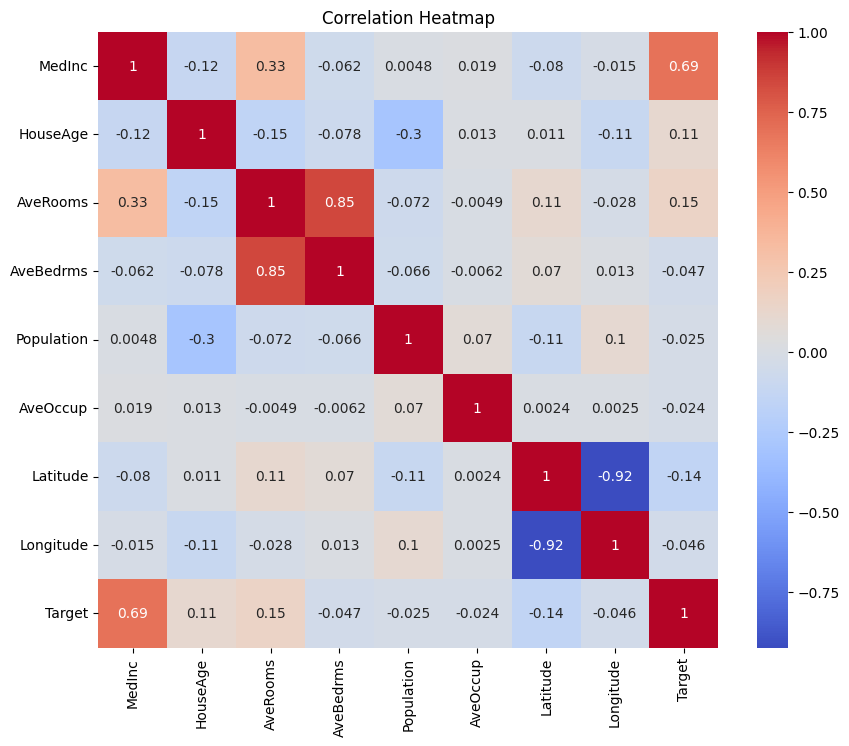

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

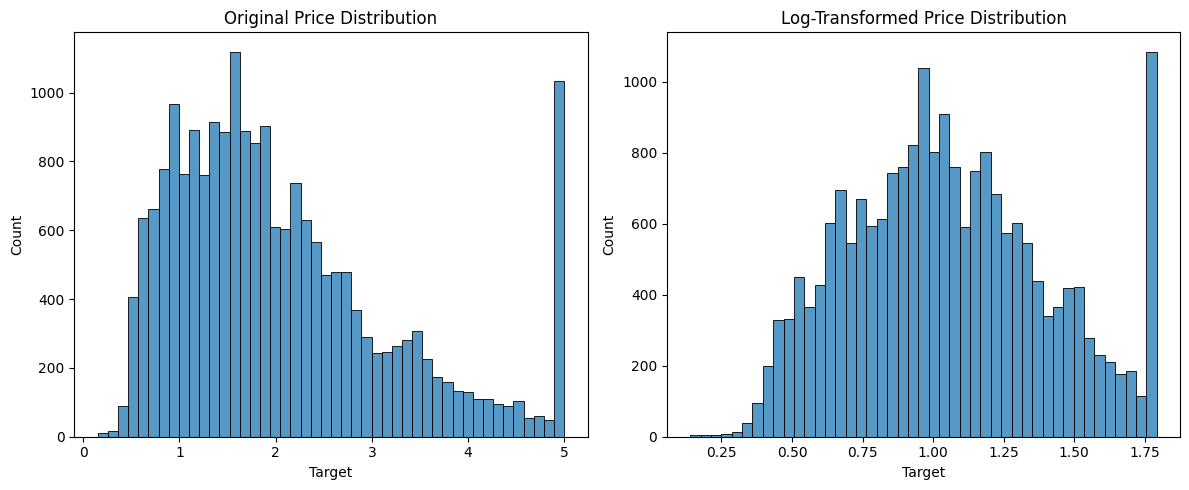

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1행 2열 서브플롯 생성
fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

# 원래 PRICE의 분포
sns.histplot(df['Target'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

# 로그 변환된 PRICE 분포
y_log = np.log1p(df['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log-Transformed Price Distribution')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 교차 검증을 통한 모델 평가
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("교차 검증 점수: ", scores)
print("평균 교차 검증 점수: ", scores.mean())

# 모델을 전체 훈련 세트에 대해 학습
model.fit(X_train, y_train)

# 테스트 세트를 사용한 모델 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 세트 정확도: ", accuracy)

교차 검증 점수:  [1.         0.9047619  0.95238095 1.         0.95238095]
평균 교차 검증 점수:  0.9619047619047618
테스트 세트 정확도:  1.0


Task1_0729. Target Column의 분포를 확인하고 다음 사항을 수행하세요.

- Target을 로그변환 및 X 변수들을 표준화한 후 모델 학습 및 평가
- 이상치 여부를 파악한 후 처리하고 모델 학습 및 평가
- 이상치 처리 전후에 대한 모델 평가 결과 비교 설명

cross_val_score는 모델을 자동으로 학습시키고 평가하여, 각 교차 검증 단계에서의 성능을 알려준다. 하지만 이 함수는 최종적으로 학습된 모델을 반환하지 않기 때문에, 전체 훈련 데이터셋에 대해 별도로 모델을 학습시켜야 한다.

먼저 데이터를 훈련 세트와 테스트 세트로 분할한 후, 교차 검증을 통해 모델 성능을 평가합니다. 이후 전체 훈련 세트에 대해 모델을 학습시키고, 테스트 세트를 사용하여 최종 성능을 평가합니다.

#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


L1 규제 (Lasso 회귀)

- L1 규제는 Lasso(L1) 회귀에서 사용. 이 규제 방식은 모델의 손실 함수에 가중치의 절대값(|w|)의 합을 추가. 수학적으로 L1 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑∣w∣) $

  α는 규제 강도를 조절하는 매개변수입니다.
- L1 규제의 주요 특징은 모델의 일부 가중치를 정확히 0으로 만들 수 있다는 것. 이는 불필요한 특성의 가중치를 제거하여 모델을 단순화하고, 결과적으로 특성 선택(feature selection)의 효과를 가지게 된다.

L2 규제 (Ridge 회귀)
- L2 규제는 Ridge(L2) 회귀에서 사용. 이 규제는 모델의 손실 함수에 가중치의 제곱의 합을 추가. 수학적으로 L2 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑w^2) $

  α 역시 규제 강도를 조절하는 매개변수이다.
- L2 규제의 주요 특징은 가중치의 크기를 제한하여 모델의 복잡도를 감소시키는 것. L2 규제는 가중치를 완전히 0으로 만들지는 않지만, 가중치 값을 줄여 과적합을 방지하는 데 도움을 준다.

요약

- Lasso 회귀(L1 규제): 불필요한 특성의 가중치를 0으로 만들어 특성 선택의 효과를 가짐.
- Ridge 회귀(L2 규제): 모든 가중치를 비슷한 수준으로 작게 유지하여 과적합 방지.
- 규제 강도: α는 모델의 복잡도와 규제 사이의 균형을 조절하는 중요한 매개변수(파이퍼파라미터)로, 적절한 값을 찾기 위해 교차 검증 등의 방법을 사용할 수 있다.

- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거 지역의 비율
- INDUS: 비소매상업지역 토지 비율
- CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치하면 1, 아니면 0)
- NOX: 산화질소 농도 (천만 분의 일)
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 보스턴의 5개 고용 센터까지의 가중 거리
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000달러 당 재산세율
- PTRATIO: 도시별 학생-교사 비율
- B: 1000(Bk - 0.63)^2 여기서 Bk는 도시별 흑인의 비율을 의미
- LSTAT: 인구 중 하위 계층의 비율(%)
- MEDV: 본인 소유의 주택 가격(중앙값) (단위: $1000)

In [17]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [20]:
# 필요한 feature이면 dtype 변환
for col in boston_df.columns:
  if boston_df[col].dtype.name == 'category':
    # category 타입을 먼저 수치형으로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
    boston_df[col] = boston_df[col].cat.codes
    # 데이터 타입을 float으로 변경
    boston_df[col] = boston_df[col].astype('float')

In [21]:
# 필요없는 feature이면 삭제
# boston_df.drop(['CHAS', 'RAD'], axis=1, inplace=True)

In [22]:
# 릿지 회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
y_target = boston_df['PRICE']

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE scores : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.771 -28.005 -32.521 -78.612 -20.685]
5 folds의 개별 RMSE scores :  [3.431 5.292 5.703 8.866 4.548]
5 folds의 평균 RMSE scores : 5.568


In [23]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.717
alpha 0.1일 때 5 folds의 평균 RMSE: 5.700
alpha 1일 때 5 folds의 평균 RMSE: 5.641
alpha 10일 때 5 folds의 평균 RMSE: 5.568
alpha 100일 때 5 folds의 평균 RMSE: 5.499


Task2_0729. alphas = [0, 0.1, 1, 10, 100]와 같이 주어졌을 때 다음을 수행하세요.
- alpha값에 따른 평균 RMSE
- alpha값에 따른 회귀계수의 변화